# Estudo de regressão
#### Dataset: [CarDekho](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/3?resource=download) - Kaggle
Este conjunto de dados contém informações sobre carros usados.
Estes dados podem ser utilizados para muitos fins, como a previsão de preços, para exemplificar a utilização da regressão linear na aprendizagem automática.
As colunas do conjunto de dados dado são as seguintes:
- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner
- mileage	
- engine	
- max_power	
- torque	
- seats

#### 1 - Análise exploratória

- Imports

In [117]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

- Carregando dados

In [118]:
#Carregando Dataset
cars = pd.read_csv("archive\Car details v3.csv", sep=",")

- Análise descritiva

In [119]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [120]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [121]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [122]:
cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [123]:
cars.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

- Limpeza dos dados

1. Tirar as unidades de medida das colunas: mileage, engine e max_power 	

In [124]:
import re
#Função que extrai somente os valores
def extract_value(text):
    match = re.search(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    return None

In [125]:
cars['engine'] = cars['engine'].apply(extract_value)
cars['mileage'] = cars['mileage'].apply(extract_value)
cars['max_power'] = cars['max_power'].apply(extract_value)
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,"11.5@ 4,500(kgm@ rpm)",5.0


2. Retirando o torque por não entender essa métrica.

In [126]:
cars = cars.drop("torque", axis=1)

3. Trocando year por tempo (atual - year)

In [127]:
from datetime import date

In [128]:
cars["year"] = date.today().year - cars["year"]

- Entendo as informações

1. Correlação das variavéis quantitativas

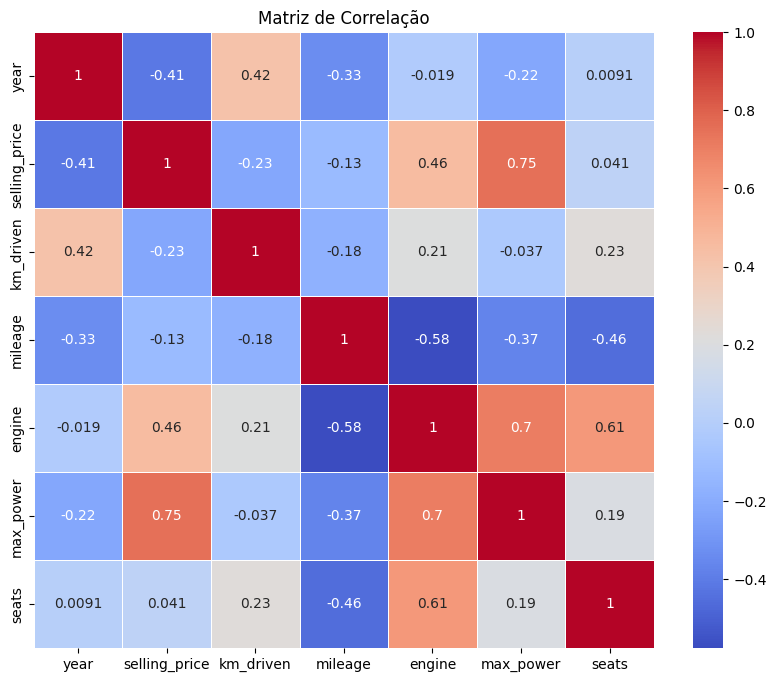

In [129]:
correlation_matrix = cars[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

<Figure size 1000x800 with 0 Axes>

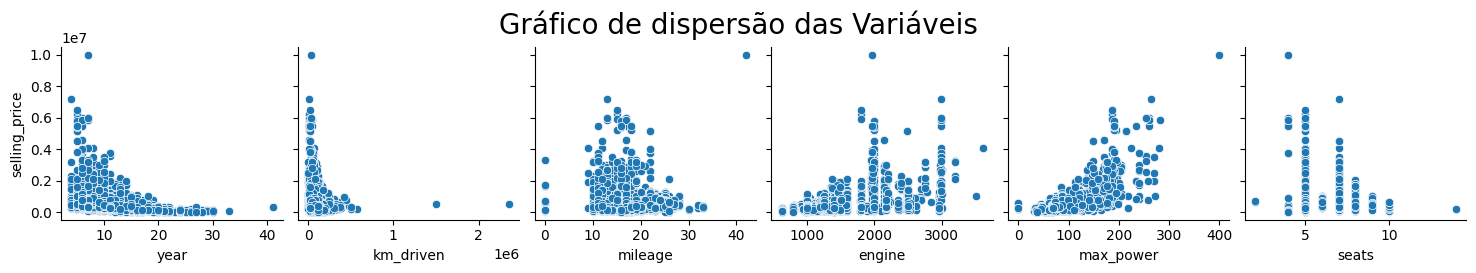

In [130]:
plt.figure(figsize=(10,8))
ax = sns.pairplot(cars, y_vars="selling_price", x_vars= ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'])
ax.figure.suptitle('Gráfico de dispersão das Variáveis', fontsize=20, y=1.05)
plt.show()

Podemos perceber as colunas tem uma relação boa com o preço.
- year: Quanto mais recente, mais caro;
- km_driven: Quanto menos km, mais caro;
- mileage: Tem uma relação mais fraca;
- engine: Quanto o maior valor, mais caro;
- max_power: Quanto o maior valor, mais caro;
- seats: Relação muito fraca;

- Entendendo as variáveis qualitativas

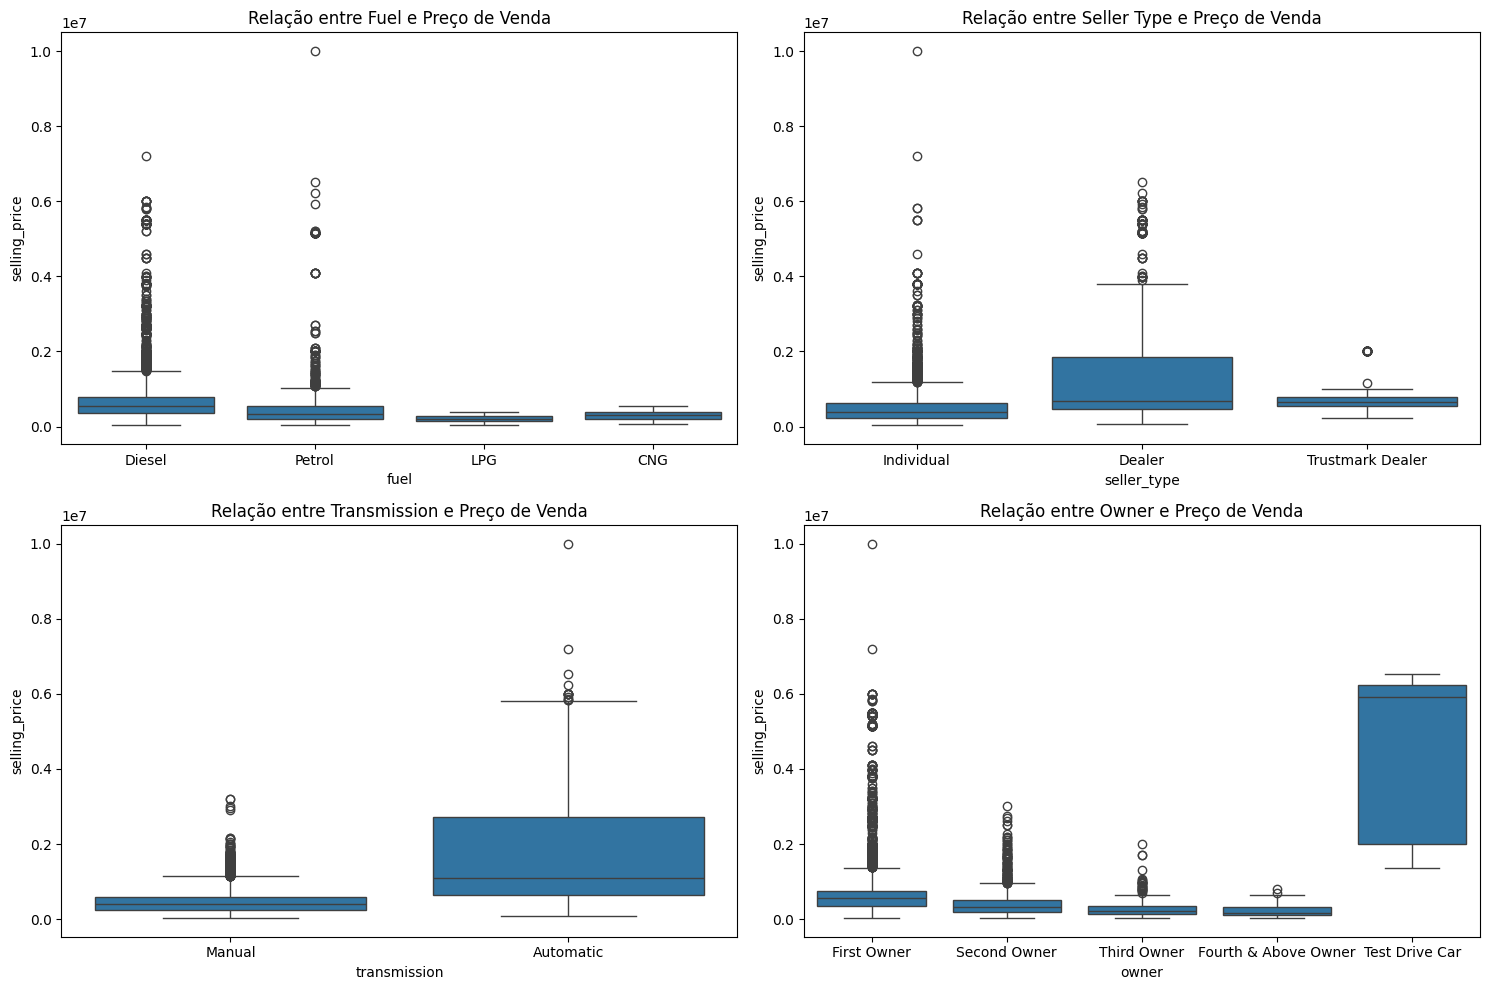

In [131]:
plt.figure(figsize=(15, 10))

# Primeiro gráfico
plt.subplot(2, 2, 1)
sns.boxplot(x='fuel', y='selling_price', data=cars)
plt.title('Relação entre Fuel e Preço de Venda')

# Segundo gráfico
plt.subplot(2, 2, 2)
sns.boxplot(x='seller_type', y='selling_price', data=cars)
plt.title('Relação entre Seller Type e Preço de Venda')

# Terceiro gráfico
plt.subplot(2, 2, 3)
sns.boxplot(x='transmission', y='selling_price', data=cars)
plt.title('Relação entre Transmission e Preço de Venda')

# Quarto gráfico
plt.subplot(2, 2, 4)
sns.boxplot(x='owner', y='selling_price', data=cars)
plt.title('Relação entre Owner e Preço de Venda')

plt.tight_layout()
plt.show()

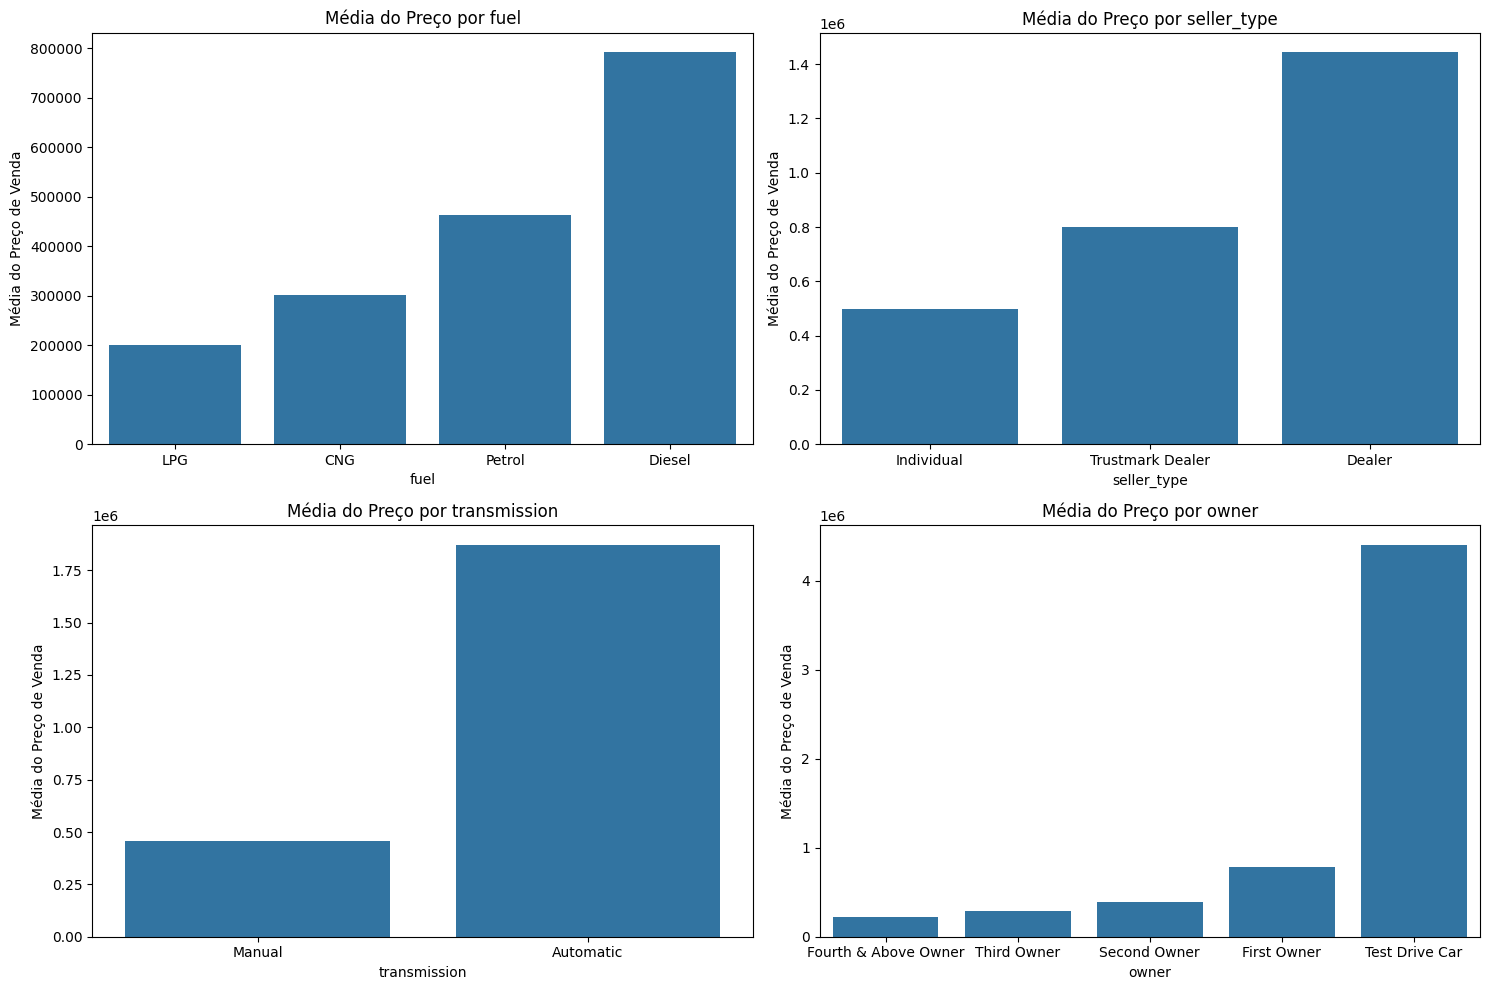

In [132]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# Plotar a média do preço para cada classe de cada coluna
for i, col in enumerate(cols):
    mean = cars.groupby(col)['selling_price'].mean().reset_index()
    mean = mean.sort_values("selling_price")
    sns.barplot(x=col, y='selling_price', data=mean, ax=axs[i])
    axs[i].set_title(f'Média do Preço por {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Média do Preço de Venda')

plt.tight_layout()
plt.show()


Podemos perceber as colunas tem uma relação boa com o preço.
- fuel: o disel tem uma media e mediana de preço maior, seguido da gasolina; 
- seller_type: carros vendidos por dealer tendem a ser mais caros, logo depois trustmark e por último individual;
- transmission: carros com transmissão automatica são em media mais caros;
- owner: Quanto mais donos o carro teve o preço fica mais baixo;

- Verificando a distribuição do preço

*Verificar se podemos aplicar uma normalização e testar o desempenho*

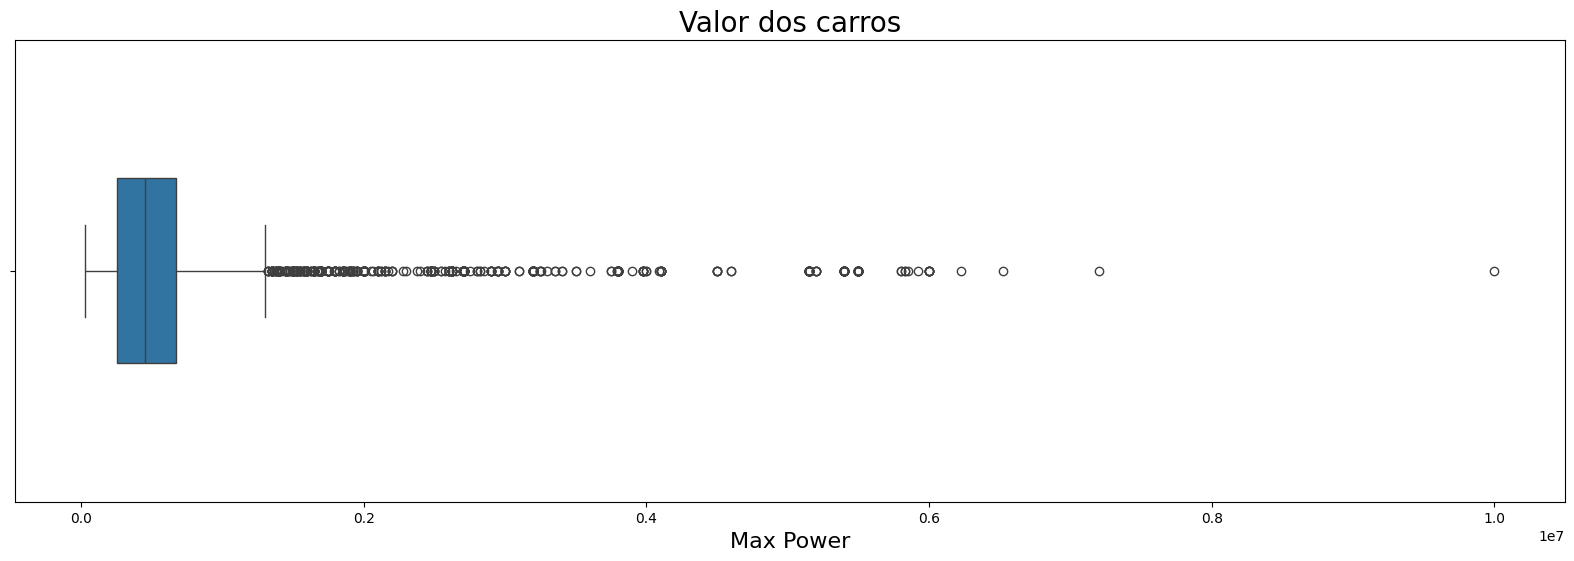

In [133]:
ax = sns.boxplot(cars, x ="selling_price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos carros', fontsize=20)
ax.set_xlabel('Max Power', fontsize=16)
plt.show()

#### 2 - Pré-processamento

- Tratando dados nulos

*Por ter 3% do dataset de campos nulos e em algumas colunas somente, vamos excluir* 

In [134]:
cars = cars.dropna()

- Separando dataset de treino e teste
  
*Como seat e nome não tem muita interferência no preço, vamos remover*

In [135]:
from sklearn.model_selection import train_test_split

X = cars[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power']]
y = cars['selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

- Encoding dos dados 

In [136]:
fuelencoder = LabelEncoder()
seller_typecoder = LabelEncoder()
transmissionencoder = LabelEncoder()
ownerencoder = LabelEncoder()
X_train['fuel'] = fuelencoder.fit_transform(X_train['fuel'])
X_train['seller_type'] = seller_typecoder.fit_transform(X_train['seller_type'])
X_train['transmission'] = transmissionencoder.fit_transform(X_train['transmission'])
X_train['owner'] = ownerencoder.fit_transform(X_train['owner'])
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
3972,9,108000,1,1,1,0,21.0,1396.0,88.0
4355,9,50000,3,1,1,0,14.0,1798.0,138.0
6835,11,50000,1,1,1,0,21.0,1248.0,88.0
4157,11,100000,1,1,1,0,23.0,1396.0,70.0
2570,5,14000,1,1,1,0,16.0,1493.0,70.0


- Normalizar os dados em colunas novas

In [137]:
y_train = pd.DataFrame(y_train)

In [138]:
y_train['log_selling_price'] = np.log(y_train)
X_train['log_km_driven'] = np.log(X_train['km_driven'])
X_train['log_mileage'] = np.log1p(X_train['mileage'])
X_train['log_engine'] = np.log(X_train['engine'])
X_train['log_max_power'] = np.log(X_train['max_power'])

In [139]:
y_train

,selling_price,log_selling_price
3972,600000,13.304685
4355,1100000,13.910821
6835,250000,12.429216
4157,250000,12.429216
2570,740000,13.514405
...,...,...
5374,711000,13.474428
5544,411000,12.926348
888,110000,11.608236
7820,900000,13.710150


- Distribuição dos valores depois da normalização

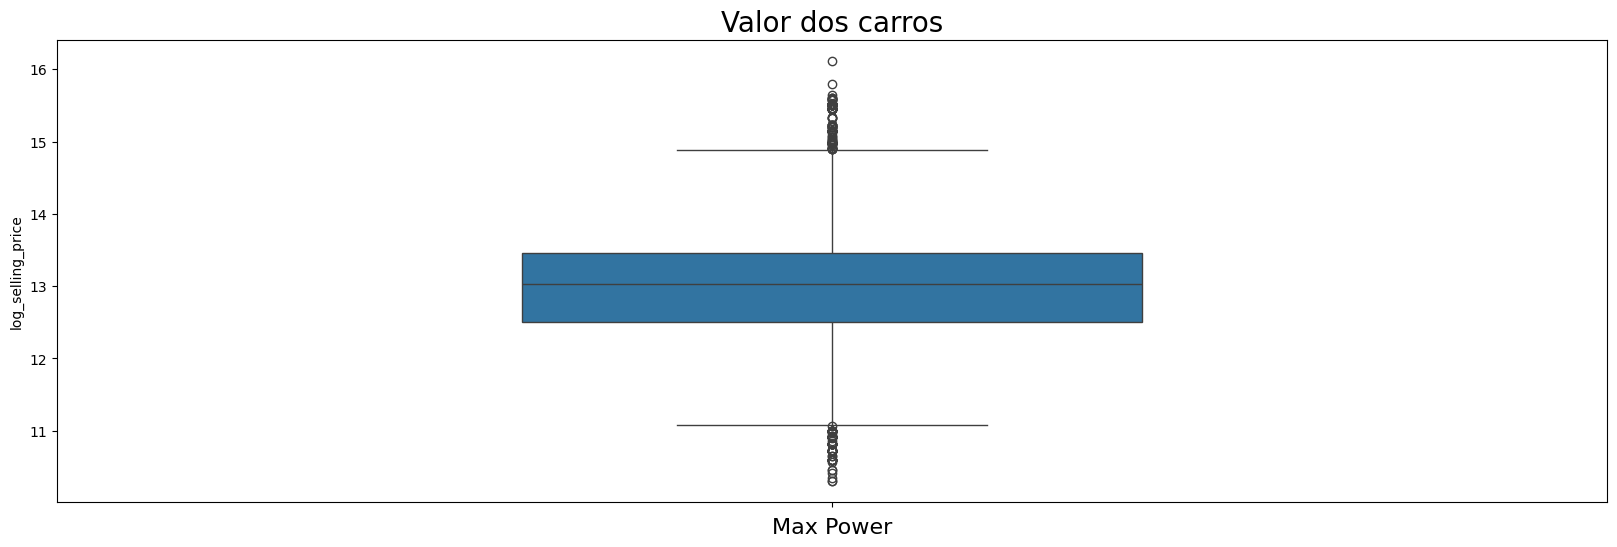

In [140]:
ax = sns.boxplot(y_train["log_selling_price"], width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos carros', fontsize=20)
ax.set_xlabel('Max Power', fontsize=16)
plt.show()

#### 3 - Treinamento
Modelos escolhidos:
- LinearRegression
- RandomForest
- GradientBoosting

##### 1 - Função de avaliação

In [141]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def evaluate_model(y_pred, y_test, log=False):
    
    # Calcular métricas
    if log:
        mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
        rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_pred))
    else:
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')


##### 2 - Aplicando transformações nos dados de teste

In [142]:
X_test['fuel'] = fuelencoder.transform(X_test['fuel'])
X_test['seller_type'] = seller_typecoder.transform(X_test['seller_type'])
X_test['transmission'] = transmissionencoder.transform(X_test['transmission'])
X_test['owner'] = ownerencoder.transform(X_test['owner'])

y_test = pd.DataFrame(y_test)

In [143]:
y_test['log_selling_price'] = np.log(y_test)
X_test['log_km_driven'] = np.log(X_test['km_driven'])
X_test['log_mileage'] = np.log1p(X_test['mileage'])
X_test['log_engine'] = np.log(X_test['engine'])
X_test['log_max_power'] = np.log(X_test['max_power'])

##### 3 - Regressão Linear + Dados sem loglog

In [144]:
from sklearn.linear_model import LinearRegression

linearRegression_model = LinearRegression()

In [145]:
X_train.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power'],
      dtype='object')

In [146]:
linearRegression_model.fit(X_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']], y_train["selling_price"])

LinearRegression()

Tempo de execução: 1.0s

In [147]:
y_pred = linearRegression_model.predict(X_test[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']])
evaluate_model(y_pred , y_test["selling_price"])

Mean Absolute Error (MAE): 268294.56020989607
Root Mean Squared Error (RMSE): 462095.1732595279
R-squared (R²): 0.681875803390378


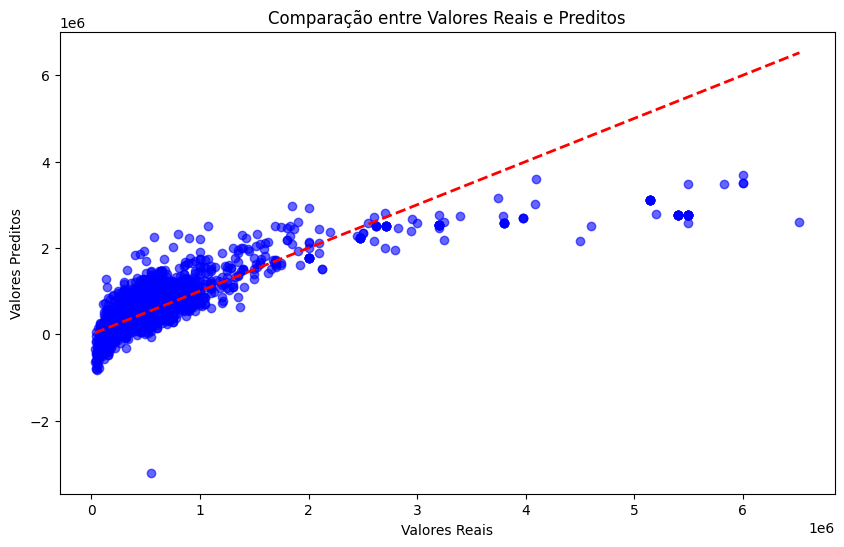

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["selling_price"]), max(y_test["selling_price"])], [min(y_test["selling_price"]), max(y_test["selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 4 - Regressão Linear + Dados com loglog

In [149]:
linearRegression_model_loglog = LinearRegression()

In [150]:
linearRegression_model_loglog.fit(X_train[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']], y_train["log_selling_price"])

LinearRegression()

Tempo de execução: 1.0s

In [151]:
y_pred = linearRegression_model_loglog.predict(X_test[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']])
evaluate_model(y_pred, y_test["log_selling_price"], True)

Mean Absolute Error (MAE): 164827.41507043544
Root Mean Squared Error (RMSE): 374127.65532686503
R-squared (R²): 0.8521532193147483


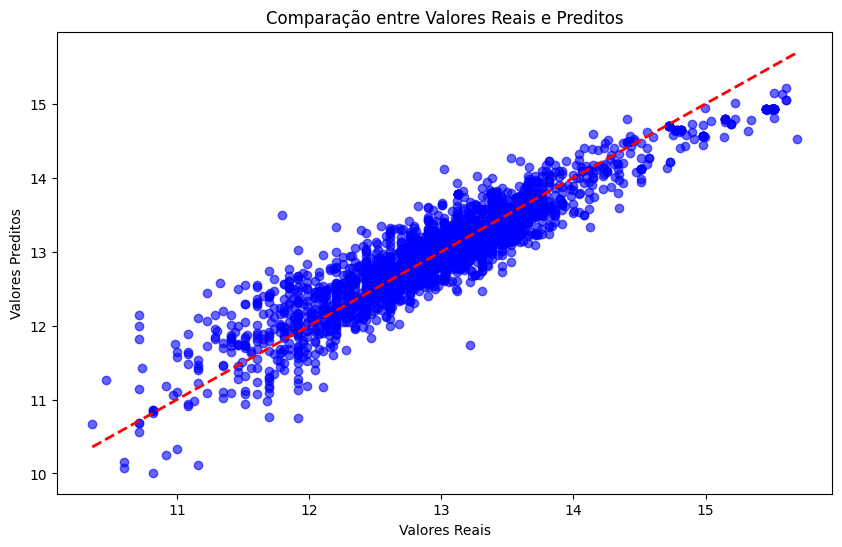

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["log_selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], [min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 5 - Random Forest + Dados sem loglog

In [153]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor()

In [154]:
randomForest_model.fit(X_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']], y_train["selling_price"])

RandomForestRegressor()

In [155]:
y_pred = randomForest_model.predict(X_test[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']])
evaluate_model(y_pred , y_test["selling_price"])

Mean Absolute Error (MAE): 69787.44390934471
Root Mean Squared Error (RMSE): 124275.51835872995
R-squared (R²): 0.9769906153080375


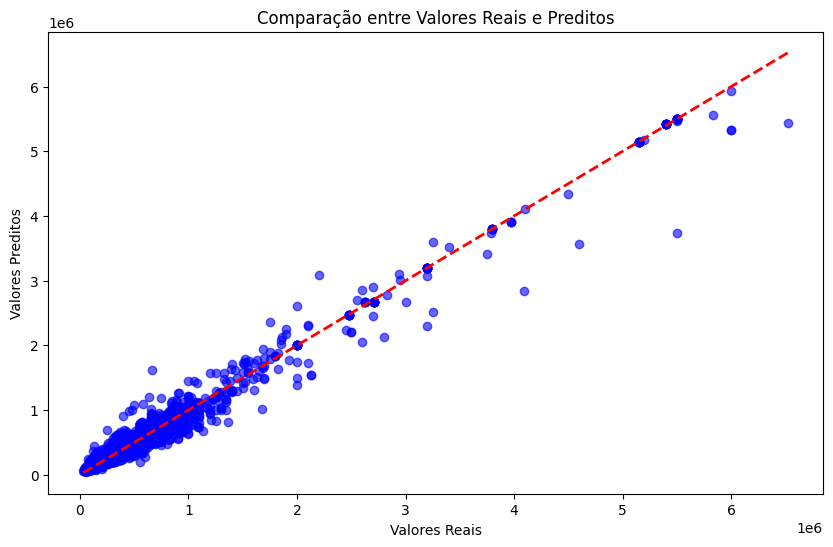

In [156]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["selling_price"]), max(y_test["selling_price"])], [min(y_test["selling_price"]), max(y_test["selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 6 - Random Forest + Dados com loglog

In [157]:
randomForest_model_loglog = RandomForestRegressor()

In [158]:
randomForest_model_loglog.fit(X_train[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']], y_train["log_selling_price"])

RandomForestRegressor()

In [159]:
y_pred = randomForest_model_loglog.predict(X_test[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']])
evaluate_model(y_pred , y_test["log_selling_price"])

Mean Absolute Error (MAE): 0.14741849202697327
Root Mean Squared Error (RMSE): 0.213771603245888
R-squared (R²): 0.93273385218079


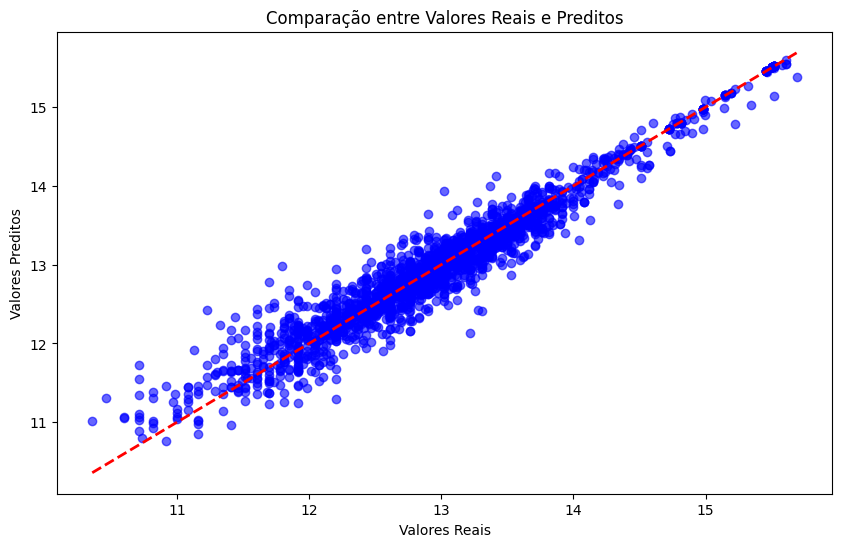

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["log_selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], [min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 7 - Gradient Boosting + Dados sem loglog

In [161]:
from sklearn.ensemble import GradientBoostingRegressor
gradientBoosting_model = GradientBoostingRegressor()

In [162]:
gradientBoosting_model.fit(X_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']], y_train["selling_price"])

GradientBoostingRegressor()

In [163]:
y_pred = gradientBoosting_model.predict(X_test[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']])
evaluate_model(y_pred , y_test["selling_price"])

Mean Absolute Error (MAE): 91758.62342090099
Root Mean Squared Error (RMSE): 154968.06945561973
R-squared (R²): 0.964221816754393


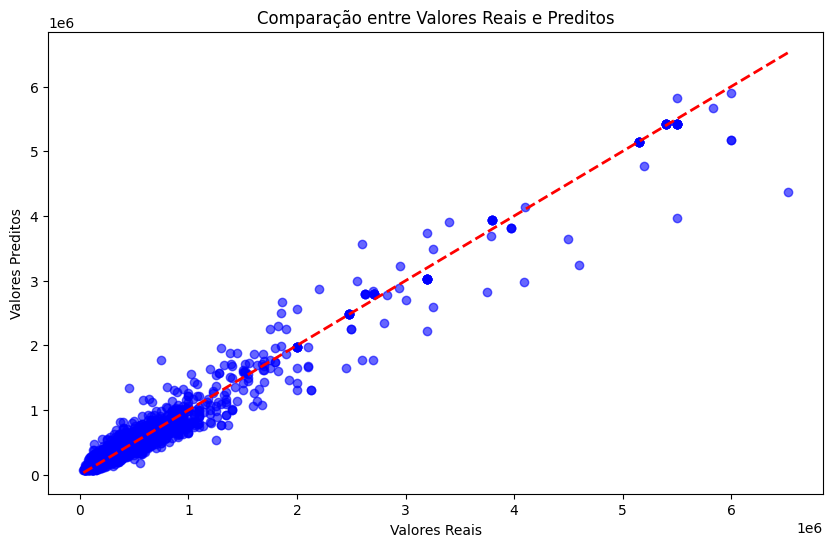

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["selling_price"]), max(y_test["selling_price"])], [min(y_test["selling_price"]), max(y_test["selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 8 - Gradient Boosting + Dados com loglog

In [165]:
gradientBoosting_model_loglog = GradientBoostingRegressor()

In [166]:
gradientBoosting_model_loglog.fit(X_train[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']], y_train["log_selling_price"])

GradientBoostingRegressor()

In [167]:
y_pred = gradientBoosting_model_loglog.predict(X_test[['year', 'fuel', 'seller_type', 'transmission', 'owner',
       'log_km_driven', 'log_mileage',
       'log_engine', 'log_max_power']])
evaluate_model(y_pred , y_test["log_selling_price"])

Mean Absolute Error (MAE): 0.17543302229047847
Root Mean Squared Error (RMSE): 0.2366622864395991
R-squared (R²): 0.9175568379332111


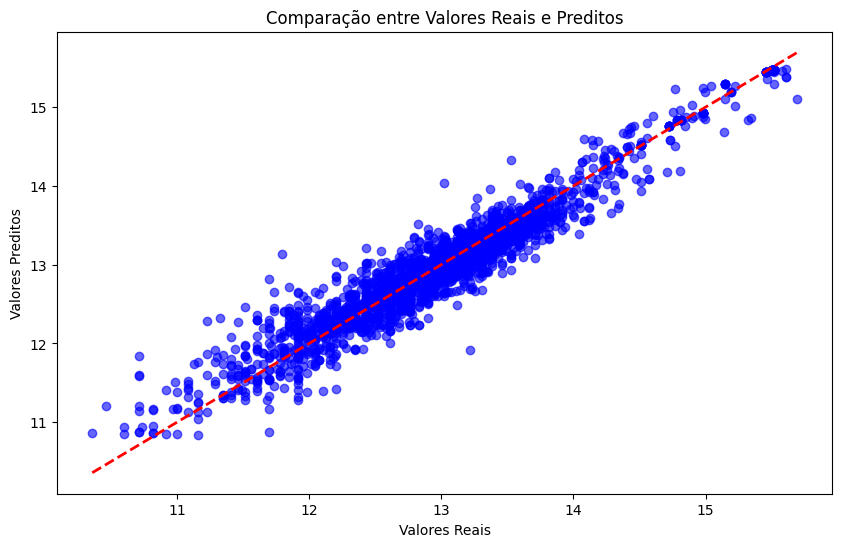

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["log_selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], [min(y_test["log_selling_price"]), max(y_test["log_selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

##### 9 - Gradient Boosting + Dados sem loglog

In [169]:
from xgboost import XGBRegressor

In [170]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']], y_train["selling_price"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:
y_pred = xgb_model.predict(X_test[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power']])
evaluate_model(y_pred , y_test["selling_price"])

Mean Absolute Error (MAE): 67430.78586108769
Root Mean Squared Error (RMSE): 122491.10418507061
R-squared (R²): 0.9776466488838196


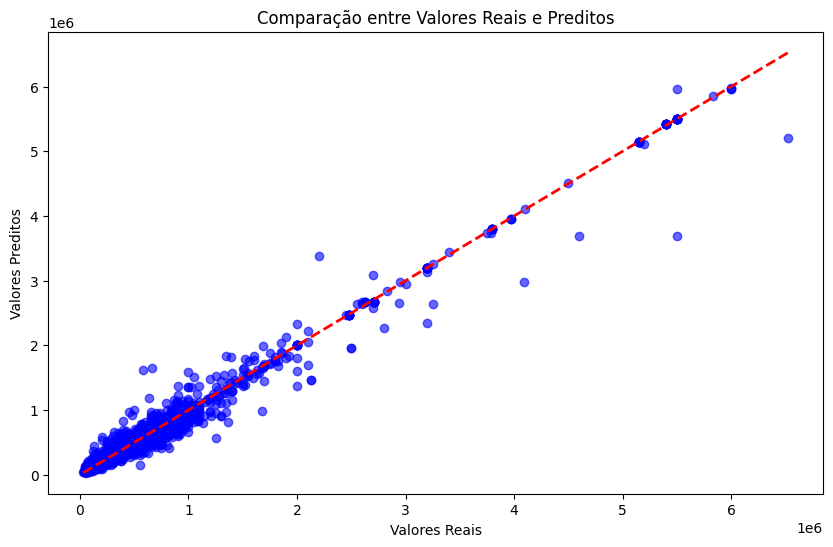

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test["selling_price"], y_pred, alpha=0.6, color='b')
plt.plot([min(y_test["selling_price"]), max(y_test["selling_price"])], [min(y_test["selling_price"]), max(y_test["selling_price"])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()